In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
# load the data
data=pd.read_csv(r"C:\Users\Chandra Shekhar\Downloads\Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.drop_duplicates()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
data.shape

(10000, 14)

In [6]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
d1=data['CreditScore']>=750
data.where(d1).dropna()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4,5.0,15737888.0,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0
6,7.0,15592531.0,Bartlett,822.0,France,Male,50.0,7.0,0.00,2.0,1.0,1.0,10062.80,0.0
24,25.0,15625047.0,Yen,846.0,France,Female,38.0,5.0,0.00,1.0,1.0,1.0,187616.16,0.0
26,27.0,15736816.0,Young,756.0,Germany,Male,36.0,2.0,136815.64,1.0,1.0,1.0,170041.95,0.0
37,38.0,15729599.0,Lorenzo,804.0,Spain,Male,33.0,7.0,76548.60,1.0,0.0,1.0,98453.45,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990.0,15605622.0,McMillan,841.0,Spain,Male,28.0,4.0,0.00,2.0,1.0,1.0,179436.60,0.0
9994,9995.0,15719294.0,Wood,800.0,France,Female,29.0,2.0,0.00,2.0,0.0,0.0,167773.55,0.0
9995,9996.0,15606229.0,Obijiaku,771.0,France,Male,39.0,5.0,0.00,2.0,1.0,0.0,96270.64,0.0
9998,9999.0,15682355.0,Sabbatini,772.0,Germany,Male,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52,1.0


In [9]:
data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [10]:
d2=data['Geography']=="France"
d3=data['Age']<=70
data.where(d1& d2& d3).dropna().sort_values('CreditScore',ascending=False)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6281,6282.0,15656921.0,Locke,850.0,France,Male,31.0,4.0,0.00,2.0,0.0,0.0,152298.28,0.0
5809,5810.0,15744109.0,Hartung,850.0,France,Male,32.0,4.0,0.00,1.0,1.0,1.0,180622.02,0.0
6265,6266.0,15624471.0,Chikwado,850.0,France,Male,37.0,6.0,0.00,2.0,1.0,0.0,109291.22,0.0
6233,6234.0,15682914.0,Bolton,850.0,France,Male,34.0,2.0,72079.71,1.0,1.0,1.0,115767.93,0.0
5988,5989.0,15809227.0,Chukwudi,850.0,France,Male,35.0,2.0,0.00,2.0,1.0,1.0,56991.66,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9640,9641.0,15647203.0,Gebhart,750.0,France,Female,35.0,3.0,0.00,1.0,1.0,0.0,191520.50,0.0
4003,4004.0,15626141.0,Fedorov,750.0,France,Female,26.0,1.0,151510.17,2.0,1.0,1.0,19921.72,0.0
3776,3777.0,15652218.0,Morrison,750.0,France,Male,33.0,2.0,152302.72,1.0,1.0,0.0,71333.44,0.0
9068,9069.0,15692235.0,Bellucci,750.0,France,Female,38.0,1.0,0.00,2.0,1.0,0.0,47764.99,0.0


<Axes: xlabel='Exited', ylabel='count'>

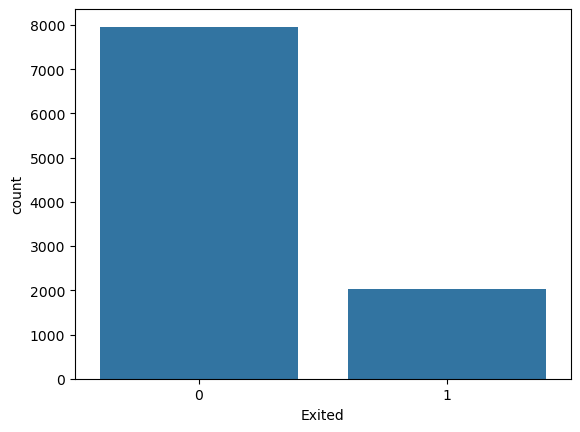

In [11]:
sns.countplot(data=data,x='Exited')

<Axes: xlabel='Exited', ylabel='Age'>

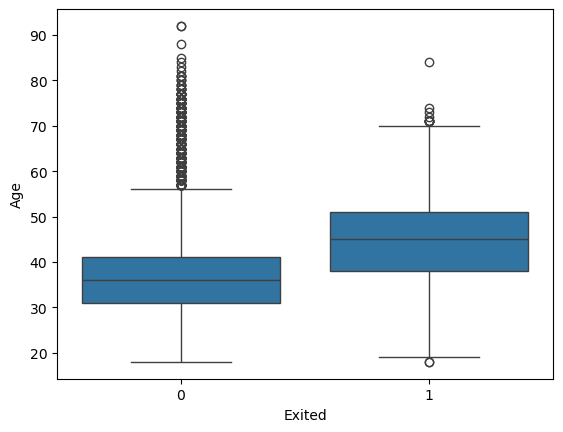

In [12]:
sns.boxplot(x='Exited', y='Age', data=data)

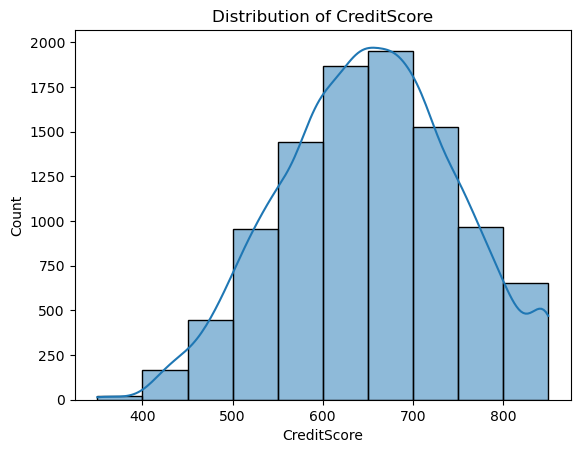

In [13]:
sns.histplot(data['CreditScore'], bins=10, kde=True)
plt.title('Distribution of CreditScore')
plt.show()

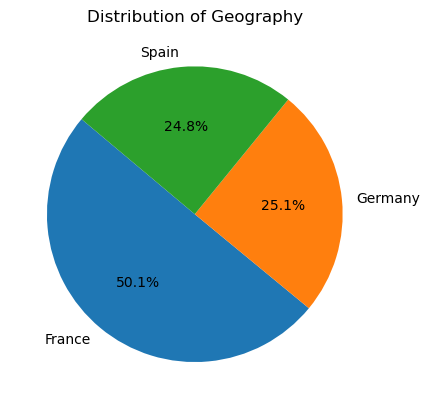

In [14]:
geography_counts=data['Geography'].value_counts()
plt.pie(geography_counts,labels=geography_counts.index,autopct='%1.1f%%',startangle=140)
plt.title('Distribution of Geography')
plt.show()

In [15]:
data=pd.get_dummies(data=data,drop_first=True)
data

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,...,False,False,False,False,False,False,False,False,False,False
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,...,False,False,False,False,False,False,False,False,True,False
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,...,False,False,False,False,False,False,False,False,False,False
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,...,False,False,False,False,False,False,False,False,False,False
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,1,0,96270.64,...,False,False,False,False,False,False,False,False,False,True
9996,9997,15569892,516,35,10,57369.61,1,1,1,101699.77,...,False,False,False,False,False,False,False,False,False,True
9997,9998,15584532,709,36,7,0.00,1,0,1,42085.58,...,False,False,False,False,False,False,False,False,False,False
9998,9999,15682355,772,42,3,75075.31,2,1,0,92888.52,...,False,False,False,False,False,False,False,True,False,True


In [16]:
# define the target and feature variables
X=data.drop(columns=["Exited","RowNumber","CustomerId"]) # Exited column is dependent column and others are independent cols.
y=data["Exited"]                          # Remove rownumber and costomerid columns are unnecessery columns

In [17]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Surname_Abbie,Surname_Abbott,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,...,False,False,False,False,False,False,False,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,...,False,False,False,False,False,False,False,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,...,False,False,False,False,False,False,False,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,...,False,False,False,False,False,False,False,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,...,False,False,False,False,False,False,False,False,True,False


In [18]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [19]:
#onehotencode categorical variables
X=pd.get_dummies(X,drop_first=True)

In [20]:
# split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("x_train:",X_train.shape)
print("x_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)


x_train: (8000, 2942)
x_test: (2000, 2942)
y_train: (8000,)
y_test: (2000,)


In [21]:
# XGBOOST ALGORITHM:

!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [22]:
import xgboost as xgb

In [23]:
xgb_model=xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [24]:
xgb_pred=xgb_model.predict(X_test)
xgb_pred

array([0, 0, 0, ..., 1, 0, 1])

In [25]:
accuracy=accuracy_score(y_test,xgb_pred)
report=classification_report(y_test,xgb_pred)

print(f"accuracy_score:{accuracy:.4f}")
print(report)

accuracy_score:0.8625
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [26]:
conf_matrix=confusion_matrix(y_test,xgb_pred)
conf_matrix

array([[1526,   81],
       [ 194,  199]], dtype=int64)